# Introducción a matrices de transmisión

Este notebook busca introducir el concepto y uso de las matrices que caracterizan a los cuadripolos desde una perspectiva programatica. En primer lugar se lleva a cabo una revisión teórica y conceptual, y luego se emula el desarrollo hecho con código, trabajando de forma simbolica y vectorial.

### Cuadripolos
Las matrices de transmisión surgen a partir de las ecuaciones que caracterízan a los cuadripolos. De forma general, la matriz que caracteriza la transmisión de un cuadripolo se puede definir como:

$$
    T =\begin{bmatrix}
    t_{11} & t_{12} \\
    t_{21} & t_{22}
    \end{bmatrix}
$$

donde cada uno de los valores de la matriz $T$ representa una relación especifica entre la entrada y la salida del cuadripolo.

$$
    \begin{align*}
        t_{11} &= \frac{v_{in}}{v_{out}} \bigg|_{i_{out} = 0} \hspace{8mm} \rightarrow \hspace{8mm} (1 / G_v)\\
        t_{12} &= \frac{v_{in}}{i_{out}} \bigg|_{v_{out} = 0} \hspace{8mm} \rightarrow \hspace{8mm} (1 / G_Y)\\
        t_{21} &= \frac{i_{in}}{v_{out}} \bigg|_{i_{out} = 0} \hspace{8mm} \rightarrow \hspace{8mm} (1 / G_Z)\\
        t_{22} &= \frac{i_{in}}{i_{out}} \bigg|_{v_{out} = 0} \hspace{8mm} \rightarrow \hspace{8mm} (1 / G_i)\\
    \end{align*}
$$

Como se puede ver, hay dos condiciones sobre las cuales se especifican los elementos.
- $v_{out} = 0$: Significa que la tensión de salida es nula, por lo que los conectores de salida estan cortocircuitados ($R_L=0$).
- $i_{out} = 0$: Significa que la corriente de salida es nula, por lo que los conectores de salida estan abiertos ($R_L=\infty$).

Dicha matriz nos dice como obtener las variables de entrada en función de las variables de salida:

$$
    \begin{equation*}
        \begin{bmatrix}
            v_{in} \\
            i_{in}
        \end{bmatrix}
        =
        T \cdot
        \begin{bmatrix}
            v_{out} \\
            i_{out}
        \end{bmatrix}
        =
        \begin{bmatrix}
            t_{11} & t_{12} \\
            t_{21} & t_{22}
        \end{bmatrix}
        \cdot
        \begin{bmatrix}
            v_{out} \\
            i_{out}
        \end{bmatrix}
        =
        \begin{bmatrix}
            t_{11} \cdot v_{out} + t_{12} \cdot i_{out}\\
            t_{21} \cdot v_{out} + t_{22} \cdot i_{out}
        \end{bmatrix}
    \end{equation*}
$$


Por lo que para obtener los variables de salida en función de las variables de entrada, debemos invertir la matriz de transmisión y aplicarla a las variables de entrada (Siempre y cuando el determinante de $T$ sea distinto de 0).

$$
    T^{-1} = 
    \frac{1}{\det(T)} \cdot
    \begin{bmatrix}
        t_{22} & -t_{12} \\
        -t_{21} & t_{11}
    \end{bmatrix}
$$


$$
    \begin{bmatrix}
        v_{in} \\
        i_{in}
    \end{bmatrix}
    =
    T \cdot
    \begin{bmatrix}
        v_{out} \\
        i_{out}
    \end{bmatrix}

    \hspace{4mm} \rightarrow \hspace{4mm}

    T^{-1} \cdot
    \begin{bmatrix}
        v_{in} \\
        i_{in}
    \end{bmatrix}
    =
    \begin{bmatrix}
        v_{out} \\
        i_{out}
    \end{bmatrix}
    =
    \begin{bmatrix}
        t_{22} \cdot v_{in} - t_{12} \cdot i_{in}\\
        -t_{21} \cdot v_{in} + t_{11} \cdot i_{in}
    \end{bmatrix}
    \cdot \frac{1}{\det(T)}
$$

A su vez, para encontrar la impedancia de entrada o salida del sistema a través de su respectiva matriz de transmisión, se considera una carga $Z_L$ en el puerto contrario al puerto que se quiere analizar:

$$
Z_{in} = \frac{t_{11}\cdot Z_L + t_{12}}{t_{21}\cdot Z_L + t_{22}}
$$

$$
Z_{out} = \frac{t_{22}\cdot Z_L + t_{12}}{t_{21}\cdot Z_L + t_{11}}
$$

Con las ecuaciónes de la tensión de salida en función de las magnitudes de entrada y la impedancia de entrada, se puede obtener encontrar la formula para hallar la tensión de salida $v_{out}$ en función de la tensión e impedancia de entrada.

$$
v_{out} = t_{22} \cdot v_{in} - t_{12} \cdot i_{in} = t_{22} \cdot v_{in} - t_{12} \cdot \frac{v_{in}}{Z_{in}} = \Big ( t_{22} - \frac{t_{12}}{Z_{in}} \Big ) v_{in}
$$

### Matrices de transmisión

Cada componente que integra un circuito tiene su representación a través de un cuadripolo en forma matricial. De forma general, la representación matricial se diferencia si los componentes son de impedancia, admitancia o transformación.

**- Matriz de transmisión de una impedancia serie ($T_Z$)**
$$
T_Z =
\begin{bmatrix}
    1 & Z \\
    0 & 1
\end{bmatrix}
$$

**- Matriz de transmisión de una admitancia paralelo ($T_Y$)**
$$
T_Y =
\begin{bmatrix}
    1 & 0 \\
    Y & 1
\end{bmatrix}
$$

**- Matriz de transmisión de un transformador ($T_T$)**
$$
T_T =
\begin{bmatrix}
    n & 0 \\
    0 & 1/n
\end{bmatrix}
$$

**- Matriz de transmisión de un girador ($T_G$)**
$$
T_G =
\begin{bmatrix}
    0 & n \\
    1/n & 0
\end{bmatrix}
$$

Por último, la transferencia total de un sistema se obtiene al realizar el producto sucesivo de las matrices de transmisión de cada elemento. De forma genérica, para un sistema compuesto de $N$ elementos, su matriz de transmisión será:

$$
T = \prod_{i=1}^{N} T_i
$$

### Ejemplo 1: Divisor de tensión

Supongamos que vamos a analizar el siguiente divisor resistivo a través de las matrices de transmisión de cada componente para así obtener la transmisión total del sistema.

<p align="center">
  <img src="../images/voltage_divisor.png" width="50%">
</p>

La idea es obtener una ecuación que relacione las magnitudes de salida (tensión y corriente de salida) en función de las magnitudes de entrada (tensión y corriente de entrada).

Primero se deben definir las matrices de ambos elementos. En este caso, $R_1$ es un componente serie, pero $R_2$ es un componente que está en paralelo, por lo que su matriz de transmisión debe ser del tipo admitancia.

$$
    T_{R_1} =
    \begin{bmatrix}
        1 & R_1 \\
        0 & 1
    \end{bmatrix}
$$

$$
    T_{R_2} =
    \begin{bmatrix}
        1 & 0 \\
        \frac{1}{R_2} & 1
    \end{bmatrix}
$$

Realizando la multiplicación sucesiva de matrices de transmisión, la transferencia total será:

$$
    T = T_{R_1} \cdot T_{R_2} = 
    \begin{bmatrix}
        1 & R_1 \\
        0 & 1
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
        1 & 0 \\
        \frac{1}{R_2} & 1
    \end{bmatrix}
    =
    \begin{bmatrix}
        1 + \frac{R_1}{R_2} & R_1 \\
        \frac{1}{R_2} & 1
    \end{bmatrix}
$$

Recordando las ecuaciones descritas anteriormente, la relación entre las magnitudes de entrada y salida queda:

$$
    \begin{equation*}
        \begin{bmatrix}
            v_{in} \\
            i_{in}
        \end{bmatrix}
        =
        T \cdot
        \begin{bmatrix}
            v_{out} \\
            i_{out}
        \end{bmatrix}
        =
        \begin{bmatrix}
          1 + \frac{R_1}{R_2} & R_1 \\
          \frac{1}{R_2} & 1
        \end{bmatrix}
        \cdot
        \begin{bmatrix}
            v_{out} \\
            i_{out}
        \end{bmatrix}
        =
        \begin{bmatrix}
            (1 + \frac{R_1}{R_2}) \cdot v_{out} + R_{1} \cdot i_{out}\\
            \frac{1}{R_2} \cdot v_{out} + i_{out}
        \end{bmatrix}
    \end{equation*}
$$

Pero lo que nos importa en la mayoría de los casos, es obtener las magnitudes de salida en función de las de entrada, por lo que:

$$
    T^{-1} = 
    \begin{bmatrix}
        1 & -R_1 \\
        -\frac{1}{R_2} & 1 + \frac{R_1}{R_2}
    \end{bmatrix}
    / \underbrace{\det(T)}_{=1} =
    \begin{bmatrix}
        1 & -R_1 \\
        -\frac{1}{R_2} & 1 + \frac{R_1}{R_2}
    \end{bmatrix}
$$

Ahora si podemos obtener la tensión y corriente de salida en función de la tensión y corriente de entrada.

$$
    T^{-1} \cdot
    \begin{bmatrix}
        v_{in} \\
        i_{in}
    \end{bmatrix}
    =
    \begin{bmatrix}
        1 & -R_1 \\
        -\frac{1}{R_2} & 1 + \frac{R_1}{R_2}
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
        v_{in} \\
        i_{in}
    \end{bmatrix}
    =
    \begin{bmatrix}
        v_{out} \\
        i_{out}
    \end{bmatrix}
    =
    \begin{bmatrix}
        v_{in} - R_{1} \cdot i_{in}\\
        -\frac{1}{R_2} \cdot v_{in} + (1 + \frac{R_1}{R_2}) \cdot i_{in}
    \end{bmatrix}
$$

$$
    \begin{align*}
        v_{out} = v_{in} - R_{1} \cdot i_{in} = v_{in} - v_{R_1} \\
        i_{out} = \frac{1}{R_2} \Big ( -v_{in} + R_1 i_{in} + R_2 i_{in}\Big)
    \end{align*}
$$

En Python todo este cálculo se puede hacer de varias forma. Una de ellas es con cálculo simbólica utilizando la libraría sympy

1) Se definen los simbolos a utilizar y se generan las matrices de transmision para los elementos del circuito.

In [1]:
import sympy as sp

R1, R2 = sp.symbols('R1 R2')

R1_tmatrix = sp.Matrix(
    [[1, R1],
     [0, 1]]
    )

R2_tmatrix = sp.Matrix(
    [[1, 0],
     [1/R2, 1]]
    )

2) Se calcula la transmisión total haciendo la multiplicación sucesiva de matrices.

In [2]:
total_tmatrix = R1_tmatrix * R2_tmatrix

print("Matriz de transmisión T")
display(total_tmatrix)

print("Matriz de transmisión inversa T^{-1}")
inverse_total_tmatrix = total_tmatrix.inv()
display(inverse_total_tmatrix)

print("Ganancia de tensión")
display(sp.simplify(1/total_tmatrix[0,0]))

Matriz de transmisión T


Matrix([
[R1/R2 + 1, R1],
[     1/R2,  1]])

Matriz de transmisión inversa T^{-1}


Matrix([
[    1,          -R1],
[-1/R2, (R1 + R2)/R2]])

Ganancia de tensión


R2/(R1 + R2)

3) Multiplicando la matriz de transmisión inversa por las magnitudes de entrada queda:

In [ ]:
v_in, i_in = sp.symbols('v_in i_in')

inverse_total_tmatrix * sp.Matrix([v_in, i_in])

Matrix([
[            -R1*i_in + v_in],
[i_in*(R1 + R2)/R2 - v_in/R2]])

### Ejemplo 2: Filtro pasabanda

<p align="center">
  <img src="../images/bandpass.png" width="70%">
</p>


1) Se definen los simbolos a utilizar y se generan las matrices de transmision para los elementos del circuito.

In [4]:
import sympy as sp

Z_C1, Z_C2, R1, R2 = sp.symbols('Z_C1 Z_C2 R1 R2')

Z_C1_tmatrix = sp.Matrix(
    [[1, Z_C1],
    [0, 1]]
)

R1_tmatrix = sp.Matrix(
    [[1, 0],
     [1/R1, 1]]
    )

R2_tmatrix = sp.Matrix(
    [[1, R2],
     [0, 1]]
    )

Z_C2_tmatrix = sp.Matrix(
    [[1, 0],
    [1/Z_C2, 1]]
)

2) Se calcula la transmisión total haciendo la multiplicación sucesiva de matrices. En este caso, se busca la respuesta en magnitud y fase de la tensión del sistema, por lo que debemos obtener la expresión de la ganancia de tensión a partir de la matriz de transmisión.

In [5]:
total_tmatrix = Z_C1_tmatrix * R1_tmatrix * R2_tmatrix * Z_C2_tmatrix

print("Matriz de transmisión T")
display(total_tmatrix)

print("Matriz de transmisión inversa T^{-1}")
inverse_total_tmatrix = total_tmatrix.inv()
display(inverse_total_tmatrix)

print("Ganancia de tensión")
display(sp.simplify((1/total_tmatrix[0,0])))

Matriz de transmisión T


Matrix([
[1 + (R2*(1 + Z_C1/R1) + Z_C1)/Z_C2 + Z_C1/R1, R2*(1 + Z_C1/R1) + Z_C1],
[                     (1 + R2/R1)/Z_C2 + 1/R1,               1 + R2/R1]])

Matriz de transmisión inversa T^{-1}


Matrix([
[               (R1 + R2)/R1,                             (-R1*R2 - R1*Z_C1 - R2*Z_C1)/R1],
[(-R1 - R2 - Z_C2)/(R1*Z_C2), (R1*R2 + R1*Z_C1 + R1*Z_C2 + R2*Z_C1 + Z_C1*Z_C2)/(R1*Z_C2)]])

Ganancia de tensión


R1*Z_C2/(R1*Z_C1 + R1*Z_C2 + R2*(R1 + Z_C1) + Z_C1*Z_C2)

3) Para visualizar la respuesta del sistema, primero debemos seleccionar valores para los componentes, en este caso se propone utilizar:

$$
\begin{align*}
R_1 &=& 3.1 ~ k\Omega \\
R_2 &=& 100 ~ k\Omega \\
C_1 &=& 100 ~ nf \\
C_2 &=& 1 ~ nf \\
\end{align*}
$$

A su vez, se debe seleccionar un rango de frecuencias a representar, y en función de dicho vector de frecuencias, generar las impedancias en función de la frecuencia de cada componente

In [6]:
import numpy as np

# Components settings
R1_value = 3_100
R2_value = 100_000
C1_value = 100e-9
C2_value = 1e-9

# Frequency settings
freq_min = 10
freq_max = 10_000
freq_bins = 2048

freq_array = np.logspace(np.log10(freq_min), np.log10(freq_max), num=freq_bins)
angular_freq_array = 2 * np.pi * freq_array

R1_array = np.ones(freq_bins)*R1_value
R2_array = np.ones(freq_bins)*R2_value
Z_C1_array = 1/(1j*C1_value*angular_freq_array) 
Z_C2_array = 1/(1j*C2_value*angular_freq_array)

4) Por último, se debe reemplazar los valores simbolicos de la expresión de ganancia por los vectores de impedancia generados.

In [7]:
voltage_gain = 1/total_tmatrix[0,0]
sp.simplify(voltage_gain)

R1*Z_C2/(R1*Z_C1 + R1*Z_C2 + R2*(R1 + Z_C1) + Z_C1*Z_C2)

In [8]:
voltage_gain_array = np.zeros(freq_bins, dtype="complex")

for i in range(freq_bins):
    voltage_gain_i = voltage_gain.subs(
        {
            R1: R1_array[i],
            Z_C1: Z_C1_array[i],
            Z_C2: Z_C2_array[i],
            R2: R2_array[i],
        }
    )
    voltage_gain_array[i] = voltage_gain_i


5) Para visualizar la respuesta, se recomienda convertir la respuesta en magnitud del sistema a dB, y el eje de frecuencias configurarlo en escala logarítmica.

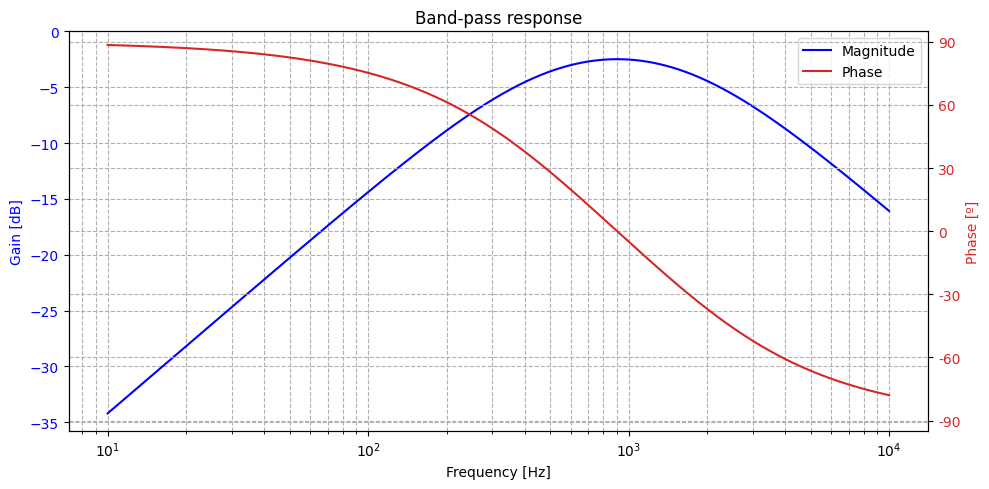

In [9]:
from matplotlib import pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,5))

# Plot for Gain
ax1.plot(freq_array, 20*np.log10(np.abs(voltage_gain_array)), label="Magnitude", color='b')
ax1.set_xscale('log')
ax1.set_xlabel("Frequency [Hz]")
ax1.set_ylabel("Gain [dB]", color='b')
ax1.set_title("Band-pass response")
ax1.set_ylim(top=0)
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, which="both", ls="--")

ax2 = ax1.twinx()
color = 'tab:red'

ax2.plot(freq_array, np.angle(voltage_gain_array)*180/np.pi, label="Phase", color=color)
ax2.set_ylabel("Phase [º]", color=color)
ax2.set_ylim(top=95, bottom=-95)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yticks(np.arange(-90, 100, 30))
ax2.set_yticklabels(np.arange(-90, 100, 30))
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')

fig.tight_layout()
plt.grid(True, which="both", ls="--")
plt.show()

---

### Ejemplo 3: Filtro resonante

<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/en/thumb/1/14/RLC_series_band-pass.svg/1280px-RLC_series_band-pass.svg.png" alt="descripcion" width="50%">
</p>

Hasta ahora funciona todo espectacular, pero hay un aspecto no menor de todo el procesamiento anterior que es bastante molesto a la hora de experimentar con la herramienta, y es el tiempo de ejecución y costo computacional.

Como se puede observar en las celdas anteriores, el reemplazo de los valores frecuencia a frecuencia en la expresión simbólica toma mucho tiempo (30 segundos en promedio (es un monton)). 

Esto se debe a que sympy es una muy buena herramienta para trabajar con expresiones matemáticas, pero no está optimizada para el cálculo vectorial. En cambio, trabajar con librerías como NumPy garantiza un mayor rendimiento ya que la mayoría de su código fuente está escrito en lenguajes de bajo nivel como C [(Referencia)](https://stackoverflow.com/questions/45796747/are-sympy-matrices-really-that-slow)

Para el circuito resonante, vamos a encarar la resolución de forma vectorizada con NumPy.

1) Ahora, al trabajar de forma vectorizada, ya no podremos inicializar un objeto simbolico y luego reemplazar valores, si no que la inicialización de las matrices debe ser con los valores de las impedancias frecuencia a frecuencia. Por lo tanto, cambia el orden en el que se definen las variables. Ahora, lo primero que debemos definir es el vector de frecuencia, en conjunto con los bines en frecuencia que queremos representar.

In [10]:
import numpy as np

freq_min = 10
freq_max = 100_000
freq_bins = 2048

freq_array = np.logspace(np.log10(freq_min), np.log10(freq_max), num=freq_bins)
angular_freq_array = 2 * np.pi * freq_array

2) Luego, debemos decidir que valores tendrán los componentes del circuito y generar los vectores de impedancia en función de la frecuencia para cada uno. En este caso se adoptan los siguientes valores:

$$
\begin{align*}
R =& 10 ~ \Omega \\
L =& 1 ~ mH \\
C =& 1 ~ \mu f \\
\end{align*}
$$

In [11]:
R_value = 10
L_value = 1e-3
C_value = 1e-6

R_array = np.ones(freq_bins)*R_value
Z_L_array = 1j*angular_freq_array*L_value
Z_C_array = 1/(1j*angular_freq_array*C_value) 

3) Una vez definidas las impedancias, se conforman las matrices de transmisión de cada elemento. Para operar de forma vectorizada, ahora las matrices serán de:

$$
(2\times 2 \times \texttt{freq bins})
$$

In [12]:
Z_L_tmatrix = np.array(
    [[np.ones(freq_bins), Z_L_array],
    [np.zeros(freq_bins), np.ones(freq_bins)]]
)

Z_C_tmatrix = np.array(
    [[np.ones(freq_bins), Z_C_array],
    [np.zeros(freq_bins), np.ones(freq_bins)]]
)

R_tmatrix = np.array(
    [[np.ones(freq_bins), np.zeros(freq_bins)],
    [1/R_array, np.ones(freq_bins)]]
)

print(R_tmatrix.shape)

(2, 2, 2048)


4. Hasta este momento no hay mucha diferencia, pero ahora es cuando se complica (un poco) la cuestión. A la hora de hacer el producto matricial, ya no puedo usar métodos integrados a NumPy porque la multiplicación que necesitamos hacer no es muy común. Recordando que la multiplicación matricial entre dos matrices se puede hacer si la dimensión última dimensión de la primer matriz es igual a la primer dimensión de la segunda matriz, en este caso estamos al horno, porque todas las matrices de transmisión serán de $(2\times 2 \times \texttt{freq bins})$.

- Para solucionar este problema, vamos a crear un producto que lo llamaremos "Layer-Wise Dot Product", ya que estaremos haciendo el producto matricial (Dot product) por capas (Layer-Wise), es decir, vamos a calcular el producto para cada bin de frecuencia.

In [13]:
def layer_wise_dot_product(*matrices: np.ndarray) -> np.ndarray:
    """
    Performs the sequential layer-wise dot product of multiple 3D matrices along the last dimension.

    Args:
    *matrices: A variable number of 3D numpy arrays.

    Returns:
    A 3D numpy array containing the sequential dot product results for each layer in the last dimension.
    """
    if not all(matrix.shape == matrices[0].shape for matrix in matrices):
        raise ValueError("All matrices must have the same dimensions.")

    result = np.zeros_like(matrices[0])

    _, _, num_layers = matrices[0].shape

    for layer_i in range(num_layers):
        # Start the product with the identity matrix for the first multiplication
        dot_product = np.eye(result.shape[0])
        for matrix in matrices:
            dot_product = np.dot(dot_product, matrix[:, :, layer_i])

        result[:, :, layer_i] = dot_product

    return result

Ahora si podemos obtener la transferencia haciendo la multiplicación sucesiva de las matrices de transmisión. La desventaja de trabajar de forma vectorizada y no simbolica, es que no tenemos la capacidad de visualizar las ecuaciones en función de los componentes, ahora simplemente observaremos una matriz compleja.

In [ ]:
total_tmatrix = layer_wise_dot_product(Z_C_tmatrix, Z_L_tmatrix, R_tmatrix)

display(total_tmatrix.shape, total_tmatrix)

(2, 2, 2048)

array([[[1.  -1591.54314773j, 1.  -1584.39813482j, 1.  -1577.28519795j,
         ..., 1.    +62.1083804j , 1.    +62.38990772j,
         1.    +62.67269813j],
        [0. -15915.43147734j, 0. -15843.9813482j , 0. -15772.85197946j,
         ..., 0.   +621.08380397j, 0.   +623.89907723j,
         0.   +626.72698129j]],

       [[0.1    +0.j        , 0.1    +0.j        , 0.1    +0.j        ,
         ..., 0.1    +0.j        , 0.1    +0.j        ,
         0.1    +0.j        ],
        [1.     +0.j        , 1.     +0.j        , 1.     +0.j        ,
         ..., 1.     +0.j        , 1.     +0.j        ,
         1.     +0.j        ]]])

5) Para graficar la respuesta de tensión en magnitud y fase del sistema, debemos obtener el array que representa la ganancia de tensión

In [15]:
voltage_gain_array = 1/total_tmatrix[0, 0, :]

In [16]:
voltage_gain_array

array([3.94787137e-07+0.00062832j, 3.98355834e-07+0.00063115j,
       4.01956791e-07+0.000634j  , ..., 2.59171367e-04-0.01609671j,
       2.56838282e-04-0.01602412j, 2.54526299e-04-0.01595185j])

6. Al igual que el ejemplo anterior, se recomienda convertir la respuesta en magnitud del sistema a dB, y el eje de frecuencias configurarlo en escala logarítmica.

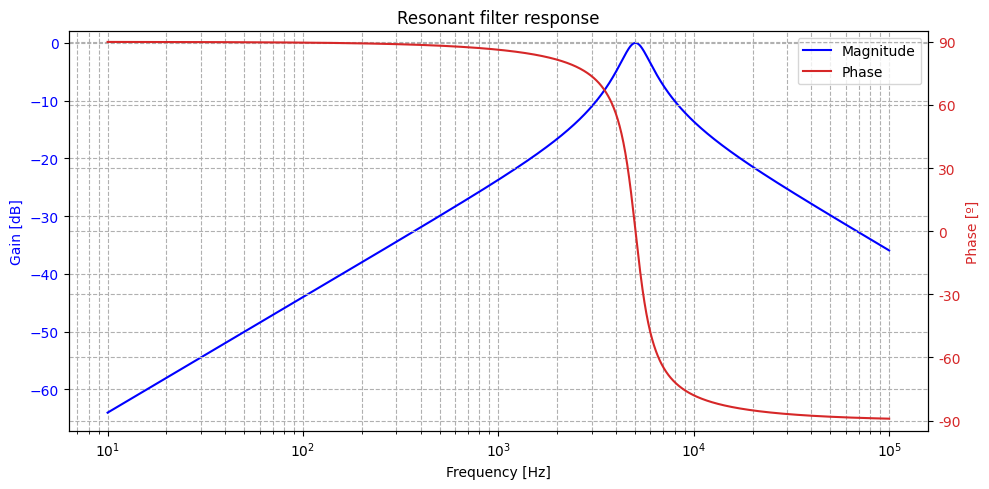

In [17]:
from matplotlib import pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,5))

# Plot for Gain
ax1.plot(freq_array, 20*np.log10(np.abs(voltage_gain_array)), label="Magnitude", color='b')
ax1.set_xscale('log')
ax1.set_xlabel("Frequency [Hz]")
ax1.set_ylabel("Gain [dB]", color='b')
ax1.set_title("Resonant filter response")
ax1.set_ylim(top=2)
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, which="both", ls="--")

ax2 = ax1.twinx()
color = 'tab:red'

ax2.plot(freq_array, np.angle(voltage_gain_array)*180/np.pi, label="Phase", color=color)
ax2.set_ylabel("Phase [º]", color=color)
ax2.set_ylim(top=95, bottom=-95)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yticks(np.arange(-90, 100, 30))
ax2.set_yticklabels(np.arange(-90, 100, 30))
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')

fig.tight_layout()
plt.grid(True, which="both", ls="--")
plt.show()

---

# Aplicación: Simulación de la respuesta de un altoparlante

El objetivo de esta sección es aplicar este método de simulación de circuitos para analizar el comportamiento de un altoparlante en los dominios eléctrico, mecánico y acústico.

Al igual que en el ejemplo anterior, primero debemos definir sobre que vector de frecuencias vamos a trabajar, establecer los valores de los componentes, generar la matriz de transmisión asociada a cada uno de ellos, y por último calcular la matriz de transmisión total.

En primer lugar, vamos a definir el circuito con el que vamos a trabajar.

<p align="center">
  <img src="../images/loudspeaker.png" width="100%">
</p>

1. Definimos el rango frecuencial sobre el cual vamos a trabajar

In [18]:
import numpy as np

freq_min = 10
freq_max = 4000
freq_bins = 2048

freq_array = np.logspace(np.log10(freq_min), np.log10(freq_max), num=freq_bins)
angular_freq_array = 2 * np.pi * freq_array

### Parámetros de Thiele Small

2. En este caso, para caracterizar el parlante vamos a utlizar los parámetros de Thiele Small. En particular vamos a definir los que se representan en el circuito equivalente, y el resto se calculan a partir de los mismos.

In [19]:
Re_value = 6.3                                    # Electric resistance of the coil [ohm]
Le_value = 1.534 *10**(-3)                        # Inductance of the coil [mH] 
Bl_value = 5.089                                  # Electromechanical factor [T*m]
Mm_value = 12.35 *10**(-3)                        # Mechanical mass [kg]
Cm_value = 0.671 *10**(-3)                        # Mechanical compliance [mm/N]
Rm_value = 0.745                                  # Mechanical resistance [N/(m/s)] = [kg/s]

A partir de las definiciones en el dominio eléctrico y mecánico, podemos calcular la frecuencia de resonancia y los factores de selectividad como:

$$
f_s = \frac{1}{2\pi\sqrt{M_{ms} \cdot C_{ms}}}
$$

$$
Q_e = \frac{2\pi \cdot f_s \cdot M_{ms}}{Bl / R_{e}}
$$

$$
Q_m = \frac{2\pi \cdot f_s \cdot M_{ms}}{R_{ms}}
$$

$$
Q_t = \frac{Q_e\cdot Q_m}{Q_e + Q_m}
$$

In [20]:
mechanical_fs = 1 / (2*np.pi*(Mm_value*Cm_value)**(1/2))                # Mechanic resonance frequency
Qe = 2*np.pi*mechanical_fs*(Mm_value+0.00092)/(Bl_value**2/Re_value)    # Electric selectivity factor
Qm = 2*np.pi*mechanical_fs*(Mm_value+0.00092)/Rm_value                  # Mechanic selectivity factor
Qt = (Qm*Qe) / (Qm+Qe)                                                  # Total selectivity factor

print(f"Mechanical resonance frequency: {np.round(mechanical_fs, 2)}")
print(f"Q(electrical): {np.round(Qe, 2)}")
print(f"Q(mechanical): {np.round(Qm, 2)}")
print(f"Q(total): {np.round(Qt, 2)}")

Mechanical resonance frequency: 55.29
Q(electrical): 1.12
Q(mechanical): 6.19
Q(total): 0.95


3. Ahora construimos las matrices de transmisión para cada elemento

In [21]:
Re_array = np.ones(freq_bins) * Re_value                # Resistor
Z_Le_array = 1j * angular_freq_array * Le_value         # Inductor
Bl_array = np.ones(freq_bins) * Bl_value
Z_Mm_array = 1j * angular_freq_array * Mm_value         # Inductor
Z_Cm_array = 1/(1j * angular_freq_array * Cm_value)     # Capacitor
Rm_array = np.ones(freq_bins) * Rm_value                # Resistor

Re_tmatrix = np.array(
    [[np.ones(freq_bins), Re_array],
    [np.zeros(freq_bins), np.ones(freq_bins)]]
)

Z_Le_tmatrix = np.array(
    [[np.ones(freq_bins), Z_Le_array],
    [np.zeros(freq_bins), np.ones(freq_bins)]]
)

Bl_tmatrix = np.array(
    [[np.zeros(freq_bins), Bl_array],
    [1/Bl_array, np.zeros(freq_bins)]]
)

Z_Mm_tmatrix = np.array(
    [[np.ones(freq_bins), Z_Mm_array],
    [np.zeros(freq_bins), np.ones(freq_bins)]]
)

Z_Cm_tmatrix = np.array(
    [[np.ones(freq_bins), Z_Cm_array],
    [np.zeros(freq_bins), np.ones(freq_bins)]]
)

Rm_tmatrix = np.array(
    [[np.ones(freq_bins), Rm_array],
    [np.zeros(freq_bins), np.ones(freq_bins)]]
)

4. Para analizar la impedancia eléctrica, y el desplazamiento y velocidad mecánica, aún no hace falta definir y calcular los parámetros del dominio acústico. Por lo tanto, con la transferencia electro-mecánica ya podemos obtener dichas curvas en frecuencia

In [22]:
# layer_wise_dot_product

import numpy as np

def layer_wise_dot_product(*matrices: np.ndarray) -> np.ndarray:
    """
    Performs the sequential layer-wise dot product of multiple 3D matrices along the last dimension.

    Args:
    *matrices: A variable number of 3D numpy arrays.

    Returns:
    A 3D numpy array containing the sequential dot product results for each layer in the last dimension.
    """
    if not all(matrix.shape == matrices[0].shape for matrix in matrices):
        raise ValueError("All matrices must have the same dimensions.")

    result = np.zeros_like(matrices[0], dtype = 'complex')

    _, _, num_layers = matrices[0].shape

    for layer_i in range(num_layers):
        # Start the product with the identity matrix for the first multiplication
        dot_product = np.eye(result.shape[0])
        for matrix in matrices:
            dot_product = np.dot(dot_product, matrix[:, :, layer_i])

        result[:, :, layer_i] = dot_product

    return result

In [23]:
electro_mechanical_tmatrix = layer_wise_dot_product(
    Re_tmatrix,
    Z_Le_tmatrix,
    Bl_tmatrix,
    Z_Mm_tmatrix,
    Z_Cm_tmatrix,
    Rm_tmatrix,
)

### Impedancia eléctrica

5. Recordando que la impedancia de entrada (en este caso tomamos como entrada la parte eléctrica) se puede calcular como:

$$
Z_{in} = \frac{t_{11}\cdot Z_L + t_{12}}{t_{21}\cdot Z_L + t_{22}}
$$

nos surgen dos condiciones sobre la cual podemos caracterizar la impedancia eléctrica:

$$
Z_L = 0  ~~~ \Longrightarrow ~~~ Z_{in} = \frac{t_{12}}{t_{22}}
$$

$$
Z_L = \infty  ~~~ \Longrightarrow ~~~ Z_{in} = \frac{t_{11}}{t_{21}}
$$

En principio nos pueden surgir dos preguntas:
- ¿Cual de las dos debemos utilizar?
    - Respuesta facil: Probá y fijate capo
- ¿Que significa $Z_L=0$ y $Z_L=\infty$ contemplando que $Z_L$ es la carga en el puerto mecánico?.

<p align="center">
  <img src="../images/electromechanical.png" width="100%">
</p>

In [24]:
# Electro-mechanical transmission matrix elements
t_11 = electro_mechanical_tmatrix[0,0]
t_12 = electro_mechanical_tmatrix[0,1]
t_21 = electro_mechanical_tmatrix[1,0]
t_22 = electro_mechanical_tmatrix[1,1]

electrical_impedance_shorted_output = t_12 / t_22   # Z(load) = 0
electrical_impedance_open_output = t_11 / t_21      # Z(load) = infty

#### Impedancia eléctrica con $Z_{L}$ = 0

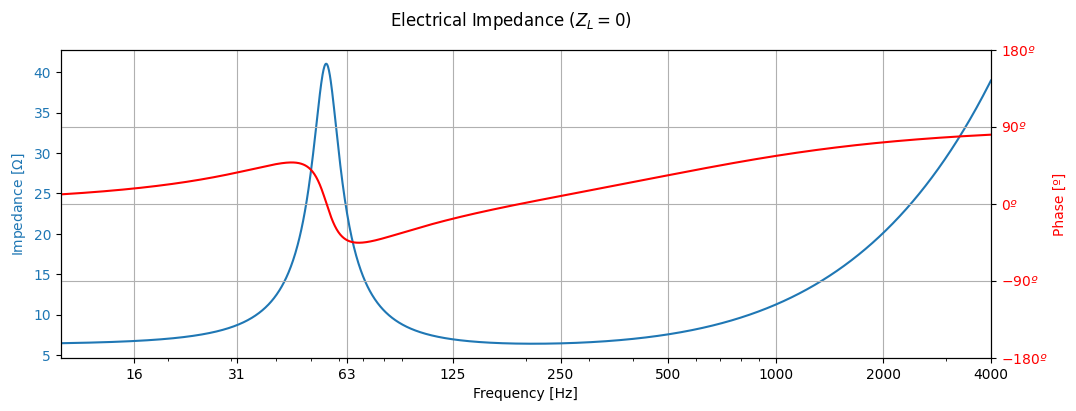

In [25]:
from matplotlib import pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,4))
fig.suptitle(r"Electrical Impedance ($Z_{L}=0$)")

ax1.semilogx(freq_array, np.abs(electrical_impedance_shorted_output), label="Magnitude", color="C0")
ax1.set_xlabel("Frequency [Hz]")
ax1.set_ylabel(r"Impedance [$\Omega$]", color="C0")
ax1.tick_params(axis="y", labelcolor="C0")

ax2 = ax1.twinx()
ax2.semilogx(freq_array, np.angle(electrical_impedance_shorted_output, deg=True), color="r", label="Phase")
ax2.set_ylabel("Phase [º]", color="r")
ax2.tick_params(axis="y", labelcolor="r")
y_label1 = [r"$-180º$",r"$-90º$",r"$0º$",r"$90º$",r"$180º$"]
ax2.set_yticks(np.array([-180,-90,0,90,180]),y_label1)

x_ticks = np.sort(np.array([16, 31, 63, 125, 250, 500, 1000, 2000, 4000]))
ax2.set_xticks(ticks = x_ticks,labels = x_ticks.tolist(), rotation=45)
plt.xlim(10,4000)
plt.ylim(-180,180)
ax1.grid(axis="x")
ax2.grid(axis="y")
plt.show()


#### Impedancia eléctrica con $Z_{L}$ = $\infty$

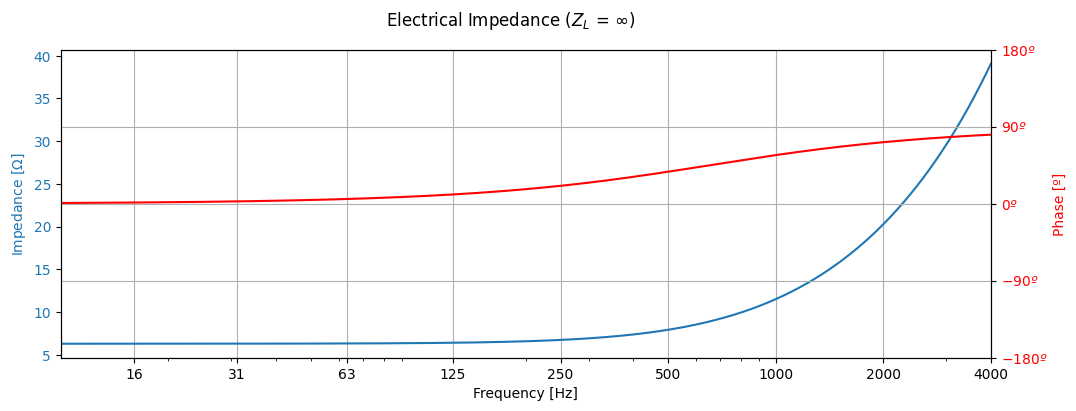

In [26]:
from matplotlib import pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,4))
fig.suptitle(r"Electrical Impedance ($Z_{L}$ = $\infty$)")

ax1.semilogx(freq_array, np.abs(electrical_impedance_open_output), label="Magnitude", color="C0")
ax1.set_xlabel("Frequency [Hz]")
ax1.set_ylabel(r"Impedance [$\Omega$]", color="C0")
ax1.tick_params(axis="y", labelcolor="C0")

ax2 = ax1.twinx()
ax2.semilogx(freq_array, np.angle(electrical_impedance_open_output, deg=True), color="r", label="Phase")
ax2.set_ylabel("Phase [º]", color="r")
ax2.tick_params(axis="y", labelcolor="r")
y_label1 = [r"$-180º$",r"$-90º$",r"$0º$",r"$90º$",r"$180º$"]
ax2.set_yticks(np.array([-180,-90,0,90,180]),y_label1)

x_ticks = np.sort(np.array([16, 31, 63, 125, 250, 500, 1000, 2000, 4000]))
ax2.set_xticks(ticks = x_ticks,labels = x_ticks.tolist(), rotation=45)
plt.xlim(10,4000)
plt.ylim(-180,180)
ax1.grid(axis="x")
ax2.grid(axis="y")
plt.show()

Establecer que $Z_L=0$ significa que no va a haber oposición a la circulación de corriente (en el dominio mećanico sería la velocidad) por parte de la carga, por lo que se generará la resonancia entre $M_{ms}$ y $C_{ms}$. 

En cambio, establecer que $Z_L=\infty$ hace que no circule corriente (o velocidad mejor dicho), en términos físicos es como si estuviera fijando el movimiento de la bobina, por lo que al no haber velocidad circulando, no se va a producir la resonancia entre $M_{ms}$ y $C_{ms}$ (que es lo que estamos acostumbrados a ver). En esta condición, lo que estaremos viendo será el comportamiento de $R_e$ en serie con $L_e$.

Tambien la respuesta se puede deducir rapidamente al analizar el circuito reflejado al dominio eléctrico.

<p align="center">
  <img src="../images/to_electrical.png" width="100%">
</p>


### Velocidad y desplazamiento mecánico

6. Recordando que la matriz de transmisión nos otorga la entrada al cuadripolo en función de la salida:

$$
\begin{equation*}
    \begin{bmatrix}
        e_{in} \\
        i_{in}
    \end{bmatrix}
    =
    T_{e-m} \cdot
    \begin{bmatrix}
        f_{out} \\
        v_{out}
    \end{bmatrix}
\end{equation*}
$$

para analizar la velocidad y fuerza mecánica, debemos hallar la matriz de transmisión inversa $T_{e-m}^{-1}$:

$$
\begin{equation*}
    T_{e-m}^{-1} \cdot
    \begin{bmatrix}
        e_{in} \\
        i_{in}
    \end{bmatrix}
    =
    \begin{bmatrix}
        f_{out} \\
        v_{out}
    \end{bmatrix}
\end{equation*}
$$

In [27]:
# Inverse of the electromechanical transmission matrix
electro_mechanical_tmatrix_det = np.abs(
    t_11*t_22 - t_12*t_21
)

electro_mechanical_tmatrix_inv = np.array(
    [[t_22 / electro_mechanical_tmatrix_det, -t_12 / electro_mechanical_tmatrix_det],
    [-t_21 / electro_mechanical_tmatrix_det,  t_11 / electro_mechanical_tmatrix_det]]
)

# Replacing e_in and i_in
electrical_input_voltage = np.ones(freq_bins)
electrical_input_current = electrical_input_voltage / electrical_impedance_shorted_output

mechanical_force, mechanical_velocity = layer_wise_dot_product(
    electro_mechanical_tmatrix_inv,
    np.array(
        [[electrical_input_voltage, electrical_input_voltage],
        [electrical_input_current, electrical_input_current]]
    ),
)[:,0]

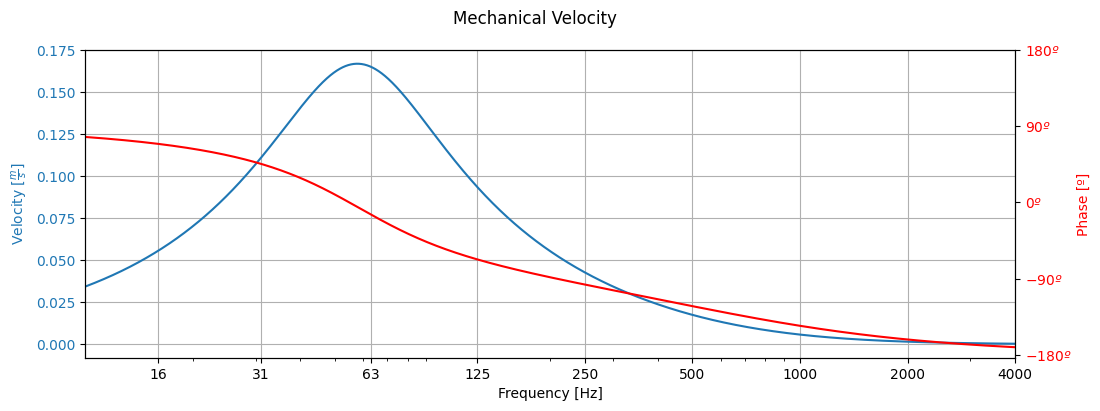

In [28]:
from matplotlib import pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,4))
fig.suptitle("Mechanical Velocity")

ax1.semilogx(freq_array, np.abs(mechanical_velocity), label="Magnitude", color="C0")
ax1.set_xlabel("Frequency [Hz]")
ax1.set_ylabel(r"Velocity [$\frac{m}{s}$]", color="C0")
ax1.tick_params(axis="y", labelcolor="C0")

ax2 = ax1.twinx()
ax2.semilogx(freq_array, np.angle(-mechanical_velocity, deg=True), color="r", label="Phase")
ax2.set_ylabel("Phase [º]", color="r")
ax2.tick_params(axis="y", labelcolor="r")
y_label1 = [r"$-180º$",r"$-90º$",r"$0º$",r"$90º$",r"$180º$"]
ax2.set_yticks(np.array([-180,-90,0,90,180]),y_label1)

x_ticks = np.sort(np.array([16, 31, 63, 125, 250, 500, 1000, 2000, 4000]))
ax2.set_xticks(ticks = x_ticks,labels = x_ticks.tolist(), rotation=45)
plt.xlim(10,4000)
# plt.ylim(-180,180)
ax1.grid(axis="both")
plt.show()

7. Para calcular el desplazamiento, debemos recurrir a la física elemental. Sabemos que la velocidad es la derivada del desplazamiento en función del tiempo, por lo que si nosotros tenemos la respuesta en velocidad, deberíamos integrar. 

$$
v(t) = \frac{\delta x(t)}{\delta t} ~~~ \Longrightarrow ~~~ \int{v(t) dt} = x(t)
$$

Ahora, la noción de integrar es en el dominio temporal, y hasta ahora estuvimos trabajando siempre en dominio frecuencial.

Acá es donde podemos acudir a José Fourier (mi buen amigo).

<p align="center">
  <img src="../images/fourier.png" width="50%">
</p>

Por propiedad de Fourier sabemos que:

$$
\mathcal{F} \Big \{\int{v(t) dt} \Big \} = \frac{\mathcal{F}\Big \{v(t)\Big \}}{j\omega} = \mathcal{F} \Big \{x(t) \Big \}
$$


In [29]:
mechanical_displacement = mechanical_velocity  / (1j*angular_freq_array)  # [(m/s) / (rad/s)] = [m/rad]
mechanical_displacement = mechanical_displacement * 1000 # [mm]

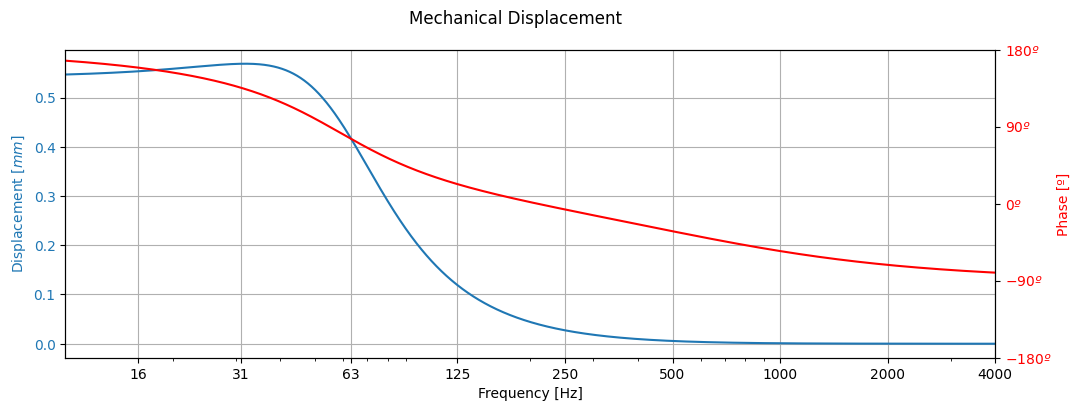

In [30]:
from matplotlib import pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,4))
fig.suptitle("Mechanical Displacement")

ax1.semilogx(freq_array, np.abs(mechanical_displacement), label="Magnitude", color="C0")
ax1.set_xlabel("Frequency [Hz]")
ax1.set_ylabel(r"Displacement [$mm$]", color="C0")
ax1.tick_params(axis="y", labelcolor="C0")

ax2 = ax1.twinx()
ax2.semilogx(freq_array, np.angle(mechanical_displacement, deg=True), color="r", label="Phase")
ax2.set_ylabel("Phase [º]", color="r")
ax2.tick_params(axis="y", labelcolor="r")
y_label1 = [r"$-180º$",r"$-90º$",r"$0º$",r"$90º$",r"$180º$"]
ax2.set_yticks(np.array([-180,-90,0,90,180]),y_label1)

x_ticks = np.sort(np.array([16, 31, 63, 125, 250, 500, 1000, 2000, 4000]))
ax2.set_xticks(ticks = x_ticks,labels = x_ticks.tolist(), rotation=45)
plt.xlim(10,4000)
# plt.ylim(-180,180)
ax1.grid(axis="both")
plt.show()

### Presión acústica

#### Constantes acústicas
8. Como primer paso en el análisis acústico, debemos definir las constantes físicas necesarias

In [31]:
sound_speed = 343                                     # Sound speed [m/s]
air_density = 1.16                                    # Air density [kg/m^3]
atmospheric_pressure = 101325                         # Atmospheric pressure [Pa]
reference_pressure = 20*10**(-6)                      # Reference pressure[Pa]
air_characteristic_impedance = air_density*sound_speed               # Characteristic air impedance

wave_number_array = angular_freq_array/sound_speed    # Wave number

9. En lo que respecta a la superficie del parlante, a partír del diámetro efectivo de radiación vamos a calcular la superficie efectiva de radiación $S_d$, que será nuestro transformador del dominio mecánico al acústico.

In [32]:
diam = 13.4 *10**(-2)                       # Effective diameter of radiation [cm] 
effective_radiation_radius = diam/2                                 # Effective radius of radiation [cm]

ka_array = wave_number_array*effective_radiation_radius

# Surface value and transmission matrix
Sd_value = np.pi*effective_radiation_radius**2   # Effective surface of radiation [cm^2]
Sd_array = np.ones(freq_bins) * Sd_value
Sd_tmatrix = np.array(
    [[Sd_array, np.zeros(freq_bins)],
    [np.zeros(freq_bins), 1/Sd_array]]
)

### Impedancia acústica de radiación

Acá viene Edu y Pepe a explicar este quilombo

In [33]:
import math

def bessel(z):
    """
    Bessel function aproximation for air radiation impedance
    """
    bessel_sum = 0
    for k in range(25):
        bessel_i = ((-1)**k * (z/2)**(2*k+1)) / (math.factorial(k) * math.factorial(k+1))
        bessel_sum = bessel_sum + bessel_i
    return bessel_sum

def struve(z):
    """
    Srtuve function aproximation for air radiation impedance
    """
    struve_sum = 0
    for k in range(25):
        struve_i = (((-1)**k * (z/2)**(2*k+2))) / (math.factorial(int(k+1/2)) * math.factorial(int(k+3/2)))
        struve_sum = struve_sum + struve_i
    return struve_sum

def dB(x):
    """
    deciBel calculus
    """
    deciBel = 20*np.log10(np.abs(x))
    return deciBel

In [34]:
ZM_rad_real_array = Sd_value*air_characteristic_impedance*(1-bessel(2*ka_array)/ka_array) 
ZM_rad_imag_array = Sd_value*air_characteristic_impedance*((struve(2*ka_array)/ka_array))
ZM_rad_array = (ZM_rad_real_array + 1j*ZM_rad_imag_array).astype(np.complex128)

ZM_rad_tmatrix = np.array(
    [[np.ones(freq_bins)  , ZM_rad_array],            # Radiation impedance array
    [np.zeros(freq_bins) , np.ones(freq_bins)]]
)

Para caracterizar la medición del parlante en un punto dado (en este caso tomaremos una distancia de 1 metro), se debe introducir una impedancia $Z_{A_{rad}}$ que caracterize la pérdida de energía desde el parlante hasta el punto de medición.

A su vez, para analizar la fase del sistema y evitar observar giros de fase debido a la propagación, se le descuenta el recorrido con $Z_{delay}$

In [35]:
measurement_distance = 1                                         # Measurement distance [m]
directivity_factor = 2                                           # Directivity factor

# Specific acoustic impedance
ZA_rad = (
    (1j * angular_freq_array * air_density * directivity_factor) / (
        4*np.pi * measurement_distance * np.exp(1j * wave_number_array * measurement_distance)
    )
)
Z_delay = np.exp(1j * wave_number_array * measurement_distance)            # Phase rotation due air propagation time

Una vez definida la impedancia acústica de radiación $Z_{m_{rad}}$ y la superficie de radiación $S_d$, podemos obtener la transferencia total del sistema, en donde estaremos caracterizando el comportamiento de los componentes eléctricos, mecánicos y acústicos.

In [36]:
electro_mechanical_acoustic_tmatrix = layer_wise_dot_product(
    electro_mechanical_tmatrix,
    ZM_rad_tmatrix,
    Sd_tmatrix
)

De las ecuaciones que relacionan a cada elemento de la matriz de transmisión con las variables de entrada y salida, podemos obtener la función de transferencia entre tensión de entrada y presión en función de la carga acústica.

$$
    \begin{equation*}
        \begin{bmatrix}
            e_{in} \\
            i_{in}
        \end{bmatrix}
        =
        T_{e-m-a} \cdot
        \begin{bmatrix}
            p_{out} \\
            U_{out}
        \end{bmatrix}
        =
        \begin{bmatrix}
            t_{11} \cdot p_{out} + t_{12} \cdot U_{out}\\
            t_{21} \cdot p_{out} + t_{22} \cdot U_{out}
        \end{bmatrix}
    \end{equation*}
$$

$$
    e_{in} = t_{11} \cdot p_{out} + t_{12} \cdot U_{out}
$$

Divido de ambos lados por $p_{out}$

$$
\frac{e_{in}}{p_{out}} = t_{11} + t_{12} \cdot \underbrace{\frac{U_{out}}{p_{out}}}_{1/Z_A} = \frac{t_{11}\cdot Z_A + t_{12}}{Z_A}
$$

Invertimos las fracciones para tener salida sobre entrada

$$
H_{e-p} = \frac{p_{out}}{e_{in}} = \frac{Z_A}{t_{11}\cdot Z_A + t_{12}}
$$

In [37]:
electrical_input_voltage = 2.83

t_11 = electro_mechanical_acoustic_tmatrix[0,0]
t_12 = electro_mechanical_acoustic_tmatrix[0,1]
t_21 = electro_mechanical_acoustic_tmatrix[1,0]
t_22 = electro_mechanical_acoustic_tmatrix[1,1]

voltage_pressure_transfer_function = (
  (ZA_rad) / (
    t_11 * ZA_rad + t_12
  )
)

acoustical_pressure = electrical_input_voltage * voltage_pressure_transfer_function * Z_delay

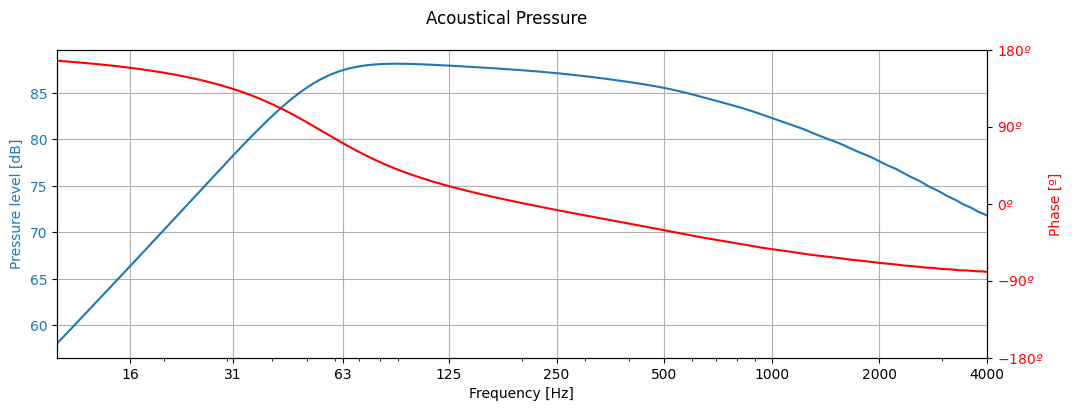

In [39]:
from matplotlib import pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,4))
fig.suptitle("Acoustical Pressure")

ax1.semilogx(freq_array, dB(np.abs(acoustical_pressure / reference_pressure)), label="Magnitude", color="C0")
ax1.set_xlabel("Frequency [Hz]")
ax1.set_ylabel(r"Pressure level [dB]", color="C0")
ax1.tick_params(axis="y", labelcolor="C0")

ax2 = ax1.twinx()
ax2.semilogx(freq_array, np.angle(acoustical_pressure / reference_pressure, deg=True), color="r", label="Phase")
ax2.set_ylabel("Phase [º]", color="r")
ax2.tick_params(axis="y", labelcolor="r")
y_label1 = [r"$-180º$",r"$-90º$",r"$0º$",r"$90º$",r"$180º$"]
ax2.set_yticks(np.array([-180,-90,0,90,180]),y_label1)

x_ticks = np.sort(np.array([16, 31, 63, 125, 250, 500, 1000, 2000, 4000]))
ax2.set_xticks(ticks = x_ticks,labels = x_ticks.tolist(), rotation=45)
plt.xlim(10,4000)
ax1.grid(axis="both")
plt.show()